Importing pandas ; Importing numpy ; Importing seaborn ; Importing matplotlib ; Importing monthly progress prediction by book value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_progress=pd.read_csv('../data/output/monthly-progress-by-book-value.csv',sep=';')

Creating the mean columns of progress dataframe

In [2]:
years=df_progress['Year'].unique()
prediction_interval=range(2,6)

df_progress = df_progress.set_index(['Year', 'Month'])

for year in years:
    index_year,index_month=df_progress.index.get_level_values('Year'),df_progress.loc[year].index.get_level_values('Month')
    for interval in prediction_interval:
        if year-interval<min(years):
            series_mean=np.nan
        else :
            series_mean=df_progress[(index_year<year)&(index_year>=year-interval)].groupby('Month')['Progress'].mean()
            for month in index_month:
                df_progress.loc[(year,month),str(interval)+' Mean']=series_mean[month]

Finding correlation between progress and mean prediction

In [3]:
for _,col in enumerate(df_progress.columns[2:]):
    print('Correlation between Progress and',col)
    print(df_progress['Progress'].corr(df_progress[col]),'\n')

Correlation between Progress and 3 Mean
0.15886503273924188 

Correlation between Progress and 4 Mean
0.2058783265908003 

Correlation between Progress and 5 Mean
0.31382355441831983 



Creating error mean dataframe ; Calculating the error mean

In [4]:
df_error_mean=pd.DataFrame(index=df_progress.index)

for interval in prediction_interval:
    df_error_mean[str(interval)+' Error']=(df_progress[str(interval)+' Mean']-df_progress['Progress'])/df_progress[str(interval)+' Mean']

print(df_error_mean.abs().groupby('Month').mean(),'\n')
print(df_error_mean.abs().mean())


        2 Error   3 Error   4 Error   5 Error
Month                                        
1      0.025543  0.030419  0.036298  0.046001
2      0.039249  0.041322  0.045926  0.046971
3      0.034684  0.040823  0.039767  0.037226
4      0.084644  0.084153  0.089484  0.086478
5      0.069283  0.057629  0.057065  0.053009
6      0.103096  0.086845  0.092198  0.094916
7      0.109756  0.086893  0.092744  0.095955
8      0.106779  0.085428  0.092288  0.083409
9      0.130884  0.105590  0.106054  0.094073
10     0.143018  0.108134  0.106855  0.098548
11     0.134631  0.089573  0.085452  0.081151
12     0.117574  0.080047  0.078063  0.074381 

2 Error    0.090576
3 Error    0.074122
4 Error    0.076255
5 Error    0.073842
dtype: float64


Visualizing the error mean on months

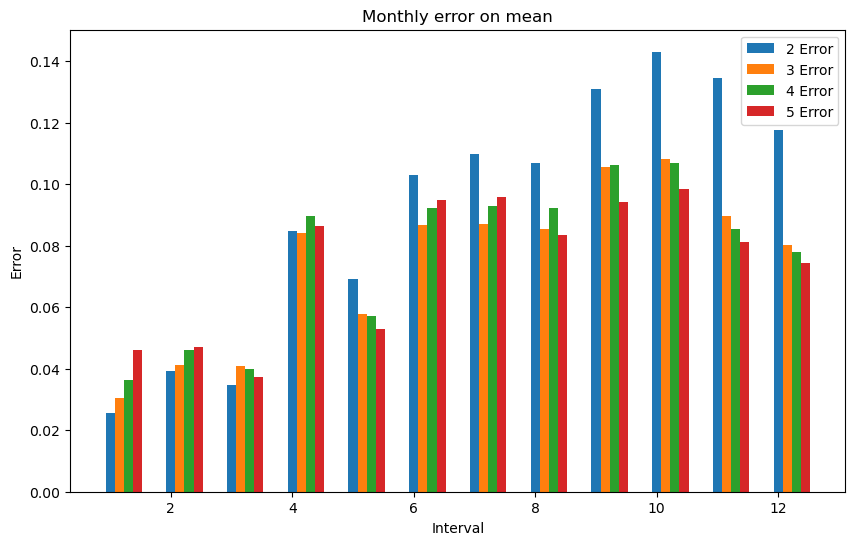

In [5]:
df_temp=df_error_mean.abs().groupby('Month').mean().reset_index()

fig,ax=plt.subplots(figsize=(10,6))
bar_width=0.15

for i,col in enumerate(df_temp.columns[1:]):
    ax.bar(df_temp['Month']+bar_width*i,df_temp[col].abs(),bar_width,label=col)
    
ax.set_title('Monthly error on mean')
ax.set_xlabel('Interval')
ax.set_ylabel('Error')
ax.legend()

plt.show()


Calculating monthly error auto correlation

In [6]:
lags=range(1,4)

for lag in lags:
    auto_corr=0;
    for _,col in enumerate(df_error_mean.columns):
        auto_corr+=df_error_mean[col].autocorr(lag)
    print('Auto-correlation at lag',lag)
    print(auto_corr/len(df_error_mean.columns),'\n')


Auto-correlation at lag 1
0.8107538057634408 

Auto-correlation at lag 2
0.6505485578362517 

Auto-correlation at lag 3
0.47869674654100686 



Updating the progress dataframe to csv ; Exporting the erroe mean dataframe to csv

In [7]:
df_progress.to_csv('../data/output/monthly-progress-by-book-value.csv',sep=';')
df_error_mean.to_csv('../data/output/monthly-progress-by-book-value-error.csv',sep=';')